In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 2: Dimensionality Reduction

[2.1] Reducing the dimensionality of the dataset to two dimensions using a) Autoencoders

In [2]:
df = pd.read_csv('nba_2022-23_stats_cleaned.csv')
df.head()

,Rank,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,2,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,3,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,4,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,5,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

**Data Preprocessing:** Drop non-numeric columns and normalise the data as Autoencoders work best with scaled data.

In [4]:
# Drop non-numeric columns
features = df.drop(columns=['Player Name', 'Team', 'Position'])

# Normalise the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features


array([[-1.72833794,  3.71021079,  1.91346367, ...,  0.08369815,
         1.81580574,  3.56512586],
       [-1.72090423,  3.64248807,  1.44563887, ..., -0.13917807,
         0.04860224, -0.37232779],
       [-1.71347052,  3.61765443,  1.91346367, ..., -0.00545234,
         0.33297981,  0.56923721],
       ...,
       [ 1.71347052, -0.78165715,  0.74390167, ..., -0.76323149,
        -0.41858949, -0.45792461],
       [ 1.72090423, -0.78411844, -0.65957273, ..., -0.58493051,
        -0.11389923, -0.45792461],
       [ 1.72833794, -0.78411844, -0.42566033, ...,  0.79690206,
        -0.94671927, -0.45792461]])

**Build the Autoencoder Model:** Define an Autoencoder with an encoding dimension of 2.

- Explanation of Layer Sizes:
    - The initial layer sizes (32, 16, and 8) allow a gradual reduction, which helps the model learn to compress data effectively without losing too much information.
    - The encoding layer is set to 2 neurons to achieve your goal of reducing the data to two dimensions.
    - This structure allows the model to distill information effectively from the 49 features down to just 2 while minimizing reconstruction loss.

In [5]:
input_dim = scaled_features.shape[1]
print(f'Input dimension: {input_dim}')

encoding_dim = 2 # Target dimension
print(f'Encoding target dimension: {encoding_dim}')

input_layer = Input(shape=(input_dim,))

# Encode layers with progressive reduction in dimensions
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded) # Final 2D encoding

# Decode layers with progressive increase in dimensions back to 49 features
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded) # Output layer for reconstruction

# Define the autoencoder model
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

Input dimension: 49
Encoding target dimension: 2


**Train the Autoencoder:**

In [6]:
autoencoder.fit(scaled_features, scaled_features, epochs=200, batch_size=32, shuffle=True, validation_split=0.2)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0182 - val_loss: 2.2357
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9618 - val_loss: 2.1571
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9092 - val_loss: 1.9836
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8521 - val_loss: 1.7593
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7636 - val_loss: 1.6341
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7093 - val_loss: 1.6000
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7455 - val_loss: 1.5950
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7105 - val_loss: 1.5944
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6988 - val_loss: 1.5955
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7085 - val_loss: 1.5973
Epoch 11/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7168 - val_loss: 1.5982
Epoch 12/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

**Extract the Encoded (Reduced) Data:** After training, use encoder of model to get reduced data and convert reduced data to new DataFrame for easier handling.

In [7]:
reduced_features = encoder.predict(scaled_features)
print(f'Reduced features: {reduced_features}')

# Convert the reduced features to a DataFrame
reduced_df = pd.DataFrame(reduced_features, columns=[f'feature_{i}' for i in range(encoding_dim)])

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Reduced features: [[1.54199009e+01 4.99215335e-01]
 [1.70351171e+00 0.00000000e+00]
 [4.75709724e+00 9.13721204e-01]
 [1.54518538e+01 0.00000000e+00]
 [1.94851856e+01 7.60868788e-01]
 [8.38177776e+00 1.02133226e+00]
 [1.46795683e+01 1.66397430e-02]
 [9.84897804e+00 9.97049928e-01]
 [3.60086823e+01 8.54630852e+00]
 [1.78023186e+01 4.47231203e-01]
 [3.09636903e+00 1.01116228e+00]
 [1.52664118e+01 1.51032031e+00]
 [4.33622208e+01 2.52999268e+01]
 [2.93143463e+00 0.00000000e+00]
 [4.43537712e+01 1.76436272e+01]
 [2.52770767e+01 1.31157935e+00]
 [1.23266621e+01 6.29240513e+00]
 [1.87704906e+01 4.06694946e+01]
 [1.43635416e+01 2.01966262e+00]
 [1.16754742e+01 1.92142117e+00]
 [1.14695683e+01 7.71143436e+00]
 [2.03974113e+01 3.81178474e+00]
 [3.02747173e+01 1.67722855e+01]
 [9.65106487e+00 5.55616677e-01]
 [1.59296904e+01 5.35782242e+00]
 [1.57203798e+01 2.49398994e+00]
 [7.19550371e+00 4.18420839e+00]
 [4.13693123e+01 9.30959129e+00]
 [6.80779219e+00 1

**Visualising the Reduced Dataset:** Applying K-Means clustering and plotting the reduced dataset with clusters.

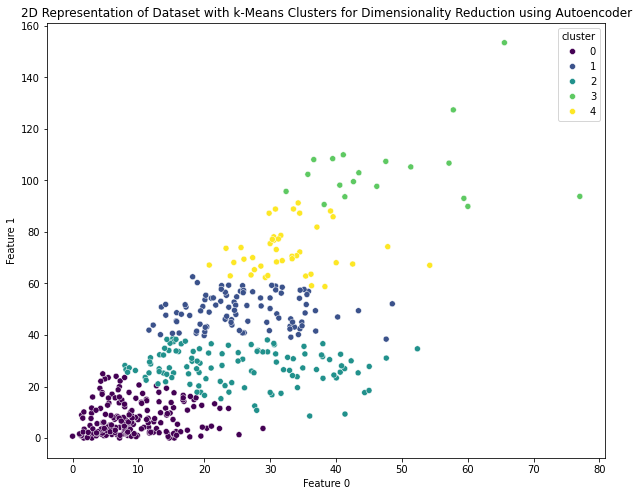

In [18]:
# Apply KMeans clustering to the reduced features
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(reduced_df)

# Add the cluster labels to the DataFrame
reduced_df['cluster'] = clusters

# Plotting reduced features with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='feature_0', y='feature_1', data=reduced_df, hue='cluster', palette='viridis')
plt.title('2D Representation of Dataset with k-Means Clusters for Dimensionality Reduction using Autoencoder')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('Question_2_Plots/Autoencoder_Clustering_2-1-a.pdf')
plt.show()